# Assignment 1

# Esercise 1

In [2]:
import pandas as pd
import numpy as np
import scipy as sc
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import os
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import dummy
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
import warnings
import matplotlib.pyplot as plt
%matplotlib inline 
warnings.filterwarnings('ignore')
sn.set_style('whitegrid')



In [3]:
db = pd.read_csv('glass.csv')

1.How many classes has the data set?
-there are 6 classes (1,2,3,5,6,7)

In [4]:
np.unique(db["Type"])

array([1, 2, 3, 5, 6, 7])

In [5]:
db.keys()

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

2- Does the data set contain null-values? No, it doesn't

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


3-How many instances has each class? Include the histogram of the classes.

In [7]:
db.dtypes
db["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

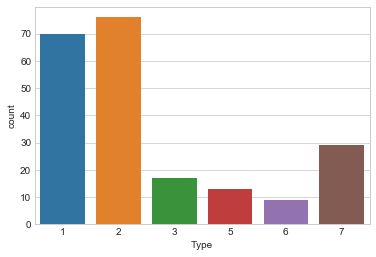

In [8]:
sn.countplot(db['Type'])
plt.show()

4-Is the data set balanced? If not, which is the class with less number of instances? it is not balance, class 6 has the lower number of instance 9. (4.2% of the entire dataset)

In [9]:
#most populated classes
p = (76+70+29+17+13+9)
last_class = (9)
last_class/p
# of the instances belong type 1 and 2 together 

0.04205607476635514

5-Describe the distribution of the variables of the dataset

RI has high variance      
Na has high variance    
Mg has high variance but at 0 has many value     
Al has high variance      
Si has high variance      
K has low variance, but few outlier   
Ca has high variance     
Ba is relatively peaked and low variance, they are all similar with some outliers     
Fe  as well    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d34ff98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1d58d668>]], dtype=object)

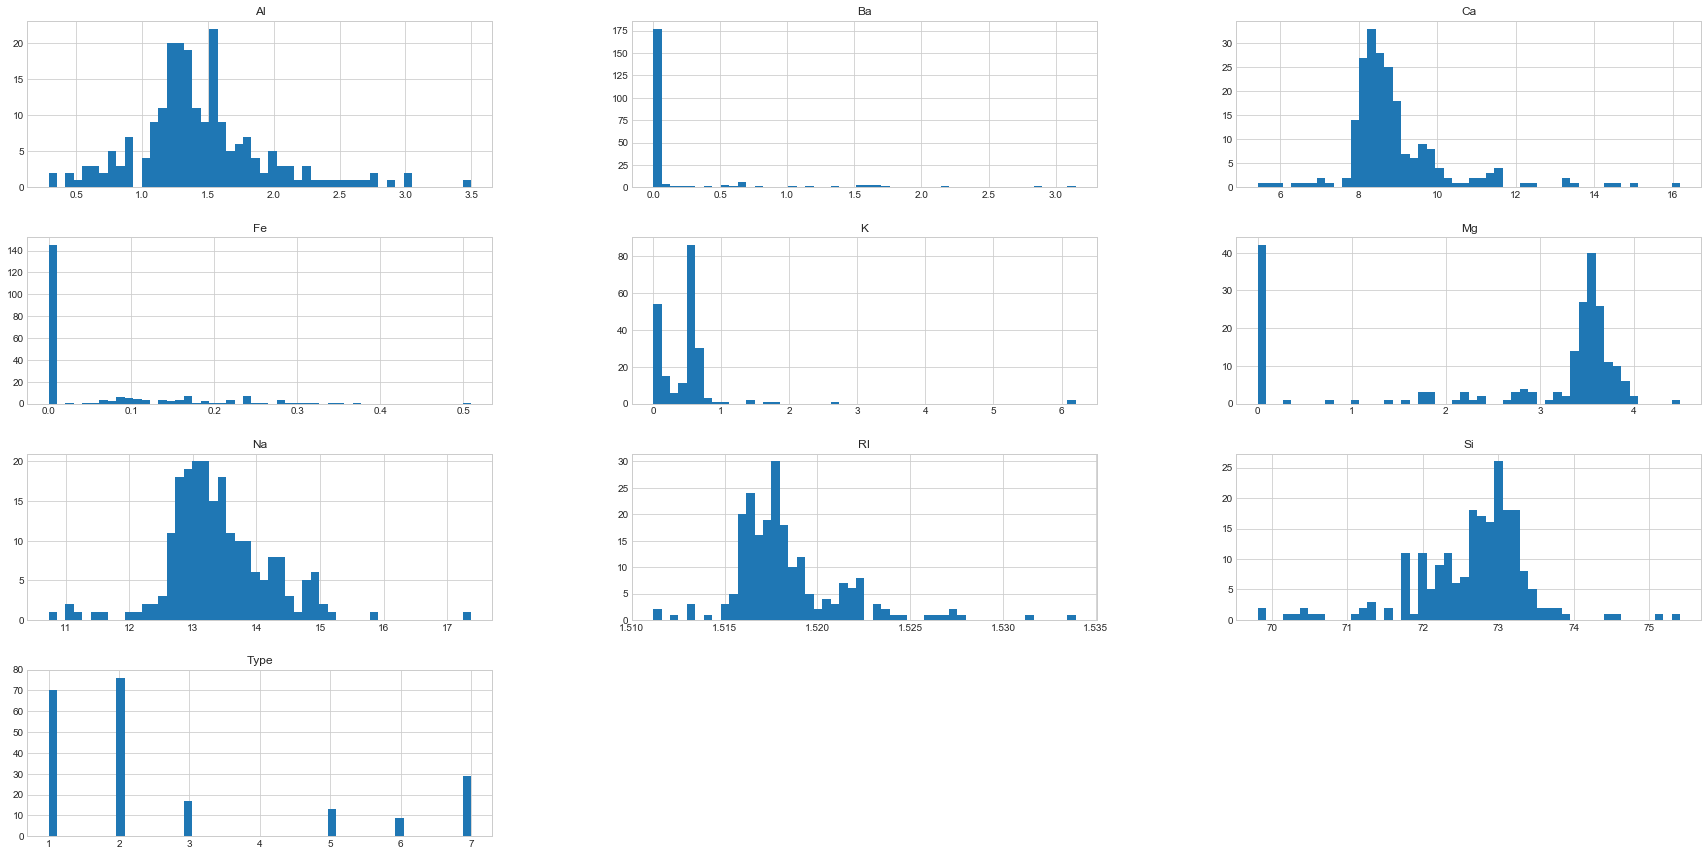

In [10]:
features = db.columns[:-1].tolist()
db["Type"].value_counts() 
db.hist(bins=50, figsize=(30,15))

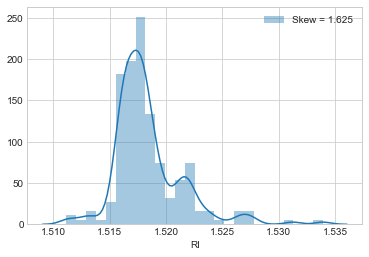

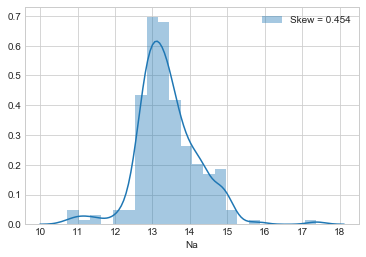

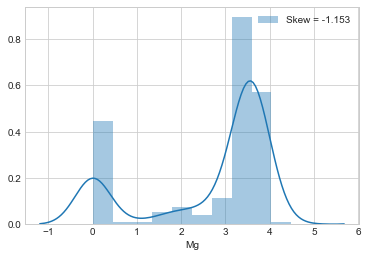

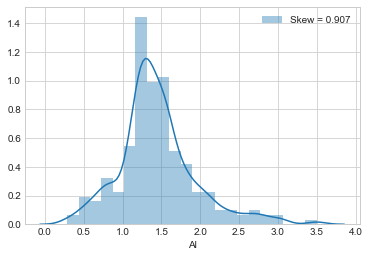

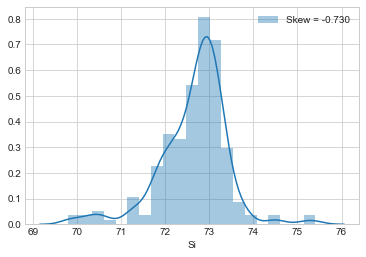

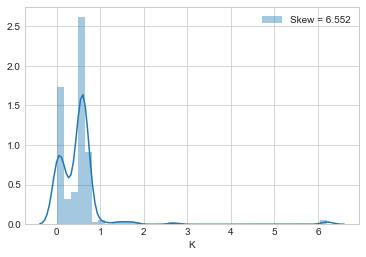

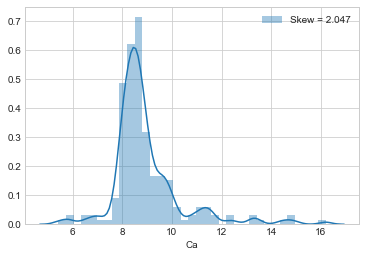

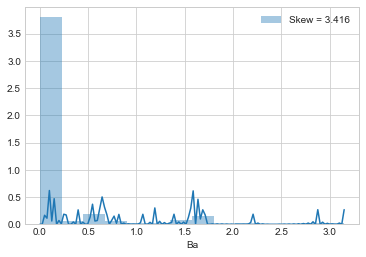

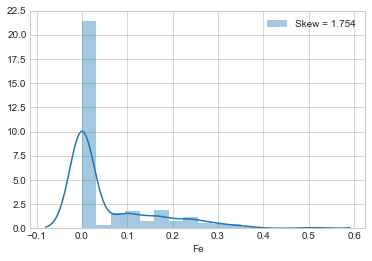

In [11]:
for i in features:
    skew = db[i].skew()
    sn.distplot(db[i], label='Skew = %.3f' %(skew))
    plt.legend(loc='best')
    plt.show()

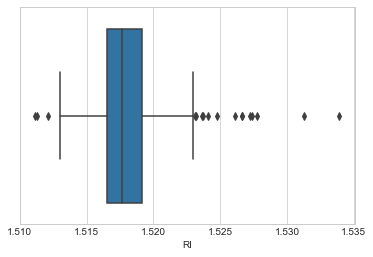

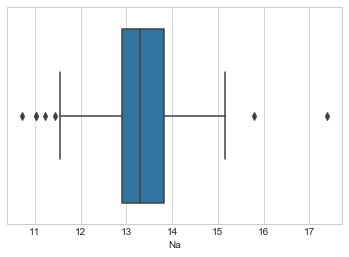

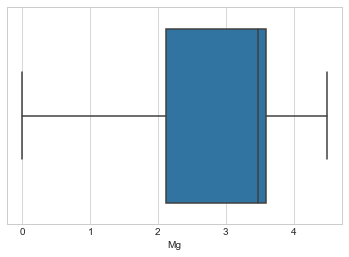

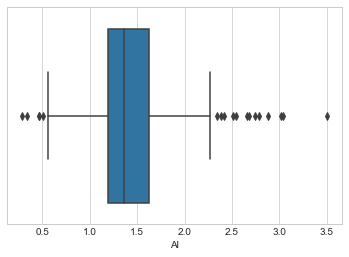

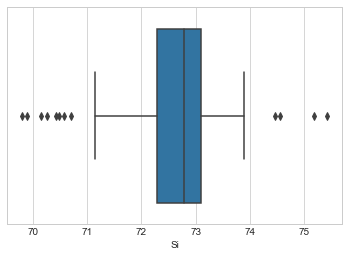

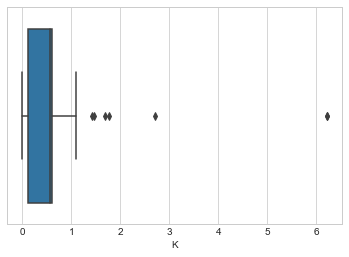

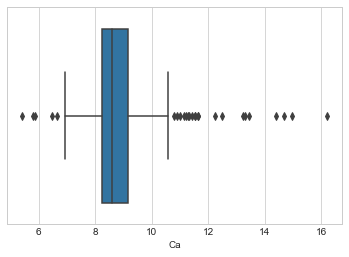

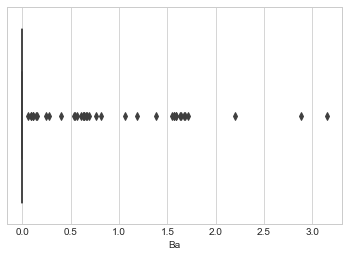

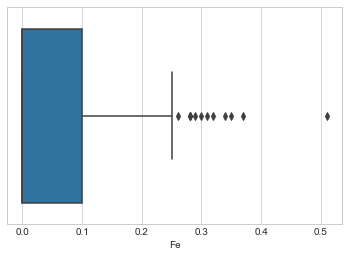

In [12]:
i=0
for col in db[features].columns.tolist():
    i+=1
    plt.figure(i)
    sn.boxplot(db[features][col])
    plt.show()

# we will only analyze the top 4 most interesting
RI has many outliers, but most of the density is concentrated in the middle 1.515-1.52
Ba almost all of its density is at 0, but it has many outliers through the range.
Mg seems to behave the best, without many outliers, and a very even density
Fe is skewed to the left, with some outliers

# Exercise 2

1-Based on the size of the data set, which of the train-test sets divisions techniques we have seen, would you use?

Unbalnced dataset suggests prefer using cross validation technique. If we use one sinle random split is likely that the smaller reppresentative class would be excluded. Instead using CV, the probability to consider all the classes properly is higher.*Stratified cross-validation*: folds are stratified so that class dist. in each fold is approx. the same as that in the initial data

In [13]:
shape = db.shape
array = db.values

#divide the datasets in 5-fold cross validation using 8 as random seed.
X = array[:, 0:shape[1] - 1]
y = array[:, shape[1] - 1]
kf = KFold(n_splits=5,random_state=8, shuffle=True)
kf.get_n_splits(X)



for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [  2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  24  28  29  31  32  33  34  35  36  37  38  39  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  66  67  68  69  70  71  72  73  74  75  76  79  81  82  83
  84  85  86  87  89  90  91  92  93  95  96  98  99 102 104 105 107 108
 109 110 111 112 113 115 116 118 119 120 121 122 123 125 126 128 129 130
 131 133 134 135 136 137 138 139 140 142 143 145 146 147 148 149 151 152
 153 154 155 156 158 159 160 163 165 167 169 170 171 173 175 176 177 178
 179 180 181 184 185 186 187 188 189 191 192 193 194 195 196 199 201 202
 203 204 205 206 207 208 209 211 213] TEST: [  0   1   5  23  25  26  27  30  65  77  78  80  88  94  97 100 101 103
 106 114 117 124 127 132 141 144 150 157 161 162 164 166 168 172 174 182
 183 190 197 198 200 210 212]
TRAIN: [  0   1   2   5   6   7   8   9  11  13  14  15  16  18  19  20  21  22
  23  25  26  27  28  29  30  31  32

2-Implement a Naive Base, k-NN and Random Guesess models with the default parameters. Do not use features normalization. Which of the models present the highest accuracy?highest precision? highest F1?

KNN "won" using every metric (see below)

KNN

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)

In [15]:
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [16]:
pred = knn.predict(X_test)

In [17]:
y_test


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  3.,  3.,  5.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.])

In [18]:
accKNN = accuracy_score(y_test, pred) * 100
f1KNN = f1_score(y_test,pred,average='weighted')*100
precisionKNN = precision_score(y_test, pred,average='weighted')*100
recallKNN = recall_score(y_test, pred,average='weighted')*100
print('\nThe accuracy of the Knn classifier for k = 3 is %d%%' % accKNN)
print('\nThe f1 scoring of Knn classifier  is %d%%' % f1KNN)
print('\nThe precision of the Knn classifier  is %d%%' % precisionKNN)
print('\nThe recall of the knn classifier  is %d%%' % recallKNN)



The accuracy of the Knn classifier for k = 3 is 69%

The f1 scoring of Knn classifier  is 67%

The precision of the Knn classifier  is 68%

The recall of the knn classifier  is 69%


NB

In [19]:
from sklearn.naive_bayes import GaussianNB


In [20]:
NB= GaussianNB()
NB.fit(X_train, y_train)

GaussianNB(priors=None)

In [21]:
predicts = NB.predict(X_test)

In [22]:
accNB = accuracy_score(y_test, predicts)*100
f1NB = f1_score(y_test,predicts,average='weighted')*100
precisionNB = precision_score(y_test, predicts,average='weighted')*100
recallNB = recall_score(y_test, predicts,average='weighted')*100
print('\nThe accuracy of the NBclassifier is %d%%' % accNB)
print('\nThe f1 scoring of NB classifier  is %d%%' % f1NB)
print('\nThe precision of the NB classifier  is %d%%' % precisionNB)
print('\nThe recall of the NB classifier  is %d%%' % recallNB)



The accuracy of the NBclassifier is 47%

The f1 scoring of NB classifier  is 40%

The precision of the NB classifier  is 49%

The recall of the NB classifier  is 47%


Random Guess

In [23]:
RG = DummyClassifier(strategy='uniform')

In [24]:
RG.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='uniform')

In [25]:
predict= RG.predict(X_test)

In [26]:
accRG = accuracy_score(y_test, predict)*100
f1RG = f1_score(y_test,predict,average='weighted')*100
precisionRG = precision_score(y_test, predict,average='weighted')*100
recallRG = recall_score(y_test, predict,average='weighted')*100
print('\nThe accuracy of the RG classifier is %d%%' % accRG)
print('\nThe f1 scoring of RG classifier  is %d%%' % f1RG)
print('\nThe precision of the RG classifier  is %d%%' % precisionRG)
print('\nThe recall of the RG classifier  is %d%%' % recallRG)


The accuracy of the RG classifier is 2%

The f1 scoring of RG classifier  is 3%

The precision of the RG classifier  is 8%

The recall of the RG classifier  is 2%


If you aim to have a small number of False Negatives (FN), which of the models would you pick? Why?

Because Recall= TP/(TP+FN) we pick the classifier with the highest Recall : The recall of the knn classifier is 70%

# Exercise 3 

1. Using GridSearchCV tune the parameters of the k-NN to improve its performance. Before applying GridSearchCV, divide the dataset in train and test set using the random split. Use the seed = 4 and the test set size = 30%. In particular verify with which of the number of neighbors among [1:100], k-NN gets the best performance, in terms of precision, recall, accuracy and F1. Which are the best number of neighbors, for these metrics? Report the metrics, are they increased?

In [27]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedShuffleSplit

In [28]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [29]:
# Create the pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)
# Define which are the parameters you are interested in. In this case C. 
# Syntax: classifier name__parameter.
# Common practice for choosing the parameters values is to try consecutive powers of 10 
param_grid = {'n_neighbors':range(2,100)}
clf=KNeighborsClassifier()

# Define the parameters of the GridSearch and fit it.
grid = GridSearchCV(clf, param_grid, cv = 5, scoring='accuracy')
grid.fit(X_train, y_train)

print("best cross-validation accuracy:", grid.best_score_)
print("test set score:", grid.score(X_test,y_test))
print("best parameters:", grid.best_params_)

best cross-validation accuracy: 0.61744966443
test set score: 0.692307692308
best parameters: {'n_neighbors': 6}


In [46]:
param_grid = {'n_neighbors':range(2,100)}
clf=KNeighborsClassifier( n_jobs=-1)
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=5, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)


In [33]:

selected_cols = [col for col in results_raw.columns.tolist() if 'mean' in col if 'time' not in col]
results = results_raw[selected_cols]
results.plot(figsize=(15,10),cmap='jet')
plt.title('Knn for n=[1,100], precision, recall, acc, f1')
plt.xlabel('N_neighbors')
plt.ylabel('Score')

NameError: name 'results_raw' is not defined

graph comment: we can  recognize some of the characteristics of overfitting and underfitting.Considering a single nearest neighbor, the prediction on the training set is perfect. Considering more neighbors, the model becomes more simple, and the training accuracy drops. The test set accuracy for using a single neighbor is lower then when using more neighbors, indicating that using a single nearest neighbor leads to a model that is too complex. On the other hand, when considering 20 neighbors, the model is too simple, and performance is even worse. The best performance is somewhere in the middle, around using four neighbors.  

2-Using GridSearchCV tune the parameters of an SVM model with a linear kernel. Before applying GridSearchCV, divide the dataset in train and test set using the random split. Use the seed = 4 and the test set size = 30%. In particular verify with which of the values of the parameter C (searching among: C = [0.001, 0.01, 0.1, 1, 10, 100]), SVM gets the best performance, in terms of precision, recall, accuracy and F1. Which is the best value for C, for these metrics? Report the metrics.

In [ ]:
shape = db.shape
array = db.values

# Divide the dataset into X and Y
X = array[:, 0:shape[1] - 1]
y = array[:, shape[1] - 1]

# Randomly split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.30, random_state=4)

In [ ]:
scoring = {'precision':make_scorer(precision_score,average='weighted'), 
           'recall': make_scorer(recall_score,average='weighted'),
           'accuracy':make_scorer(accuracy_score),
           'f1_score':make_scorer(f1_score,average='weighted')}

param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100] }

clf =  clf = make_pipeline(MinMaxScaler(), svm.SVC(kernel ='linear'))
grid = GridSearchCV(clf,param_grid=param_grid,scoring=scoring,cv=5,refit='f1_score')
grid.fit(X_train,y_train)

results_raw = pd.DataFrame(grid.cv_results_,index=[0.001, 0.01, 0.1, 1, 10, 100])
selected_cols = [col for col in results_raw.columns.tolist() if 'mean' in col if 'time' not in col]
results = results_raw[selected_cols]

In [ ]:
results.plot(kind='bar',figsize=(15,10),cmap='jet')
plt.title('SVC for C=[0.001, 0.01, 0.1, 1, 10, 100], precision, recall, acc, f1')
plt.xlabel('C')
plt.ylabel('Score')

In [ ]:
results


best precision k= 10, best recall k= 10, best accuracy k= 10,best F1 k=10

3-Compare the results you obtained using k-NN and SVM. Which of the two models would pick if your aim was to have a small number of False Positives (FP)? Why?

precision = TP/(TP+FP) we pick the classifier with the highest Precision : knn (0.679219) vs svc (k=10, 0.527474)